In [580]:
import pandas as pd
import matplotlib.pyplot as plt

In [581]:
#Read in the Community_Health_Indicator_Reports_raw.csv file into a Pandas DataFrame.
df = pd.read_csv('Community_Health_Indicator_Reports_raw.csv')
df = df.drop(['Data Notes', 'Data Source'], axis=1)
df.head()

,Topic Area,Indicator Title,Geographic area,Year type,Year,Measurement,Rate/Percent
0,Cancer Indicators,"All cancer incidence rate per 100,000",Albany County,Data Year,2011,Incidence rate,627.1
1,Cancer Indicators,"All cancer incidence rate per 100,000",Albany County,Data Year,2011-2013,Incidence rate,593.8
2,Cancer Indicators,"All cancer incidence rate per 100,000",Albany County,Data Year,2012,Incidence rate,600.0
3,Cancer Indicators,"All cancer incidence rate per 100,000",Albany County,Data Year,2012-2014,Incidence rate,597.0
4,Cancer Indicators,"All cancer incidence rate per 100,000",Albany County,Data Year,2013,Incidence rate,575.9


In [582]:
df.describe()

,Topic Area,Indicator Title,Geographic area,Year type,Year,Measurement,Rate/Percent
count,306830,306829,306829,306829,306829,305713,302117
unique,16,303,68,4,46,50,18955
top,Cancer Indicators,Age-adjusted cardiovascular disease mortality ...,Albany County,Data Year,2017,Hospitalization rate,s
freq,42966,2232,4964,298768,17712,70804,27235


In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306830 entries, 0 to 306829
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Topic Area       306830 non-null  object
 1   Indicator Title  306829 non-null  object
 2   Geographic area  306829 non-null  object
 3   Year type        306829 non-null  object
 4   Year             306829 non-null  object
 5   Measurement      305713 non-null  object
 6   Rate/Percent     302117 non-null  object
dtypes: object(7)
memory usage: 16.4+ MB


In [584]:
#Check the unique values in Geographic area
df["Geographic area"].unique()

array(['Albany County', 'Allegany County', 'Broome County',
       'Cattaraugus County', 'Cayuga County', 'Chautauqua County',
       'Chemung County', 'Chenango County', 'Clinton County',
       'Columbia County', 'Cortland County', 'Delaware County',
       'Dutchess County', 'Erie County', 'Essex County',
       'Franklin County', 'Fulton County', 'Genesee County',
       'Greene County', 'Hamilton County', 'Herkimer County',
       'Jefferson County', 'Lewis County', 'Livingston County',
       'Madison County', 'Monroe County', 'Montgomery County',
       'Nassau County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Rensselaer County', 'Rockland County',
       'St. Lawrence County', 'Saratoga County', 'Schenectady County',
       'Schoharie County', 'Schuyler County', 'Seneca County',
       'Steuben County', 'Suffolk County', 'Sullivan County',
 

In [585]:
# Choose the 7 counties our project is focusing
county_list = ['Nassau County', 'Richmond County', 'Kings County', 'New York County', 'Queens County', 'Bronx County', 'Suffolk County']

In [586]:
# Make a dataframe with the seven counties, and sort the value to make it cleaner
filtered_df = df[df['Geographic area'].isin(county_list)]
sorted_df = filtered_df.sort_values(by='Geographic area')
sorted_df.set_index('Geographic area')

,Topic Area,Indicator Title,Year type,Year,Measurement,Rate/Percent
Geographic area,,,,,,
Bronx County,Maternal and Infant Health Indicators,Percentage very low birthweight (<1.5 kg) births,Data Year,2012,Percentage of births,2.0
Bronx County,Injury Indicators,Age-adjusted self-inflicted injury hospitaliza...,Data Year,2014,Hospitalization rate,4.8
Bronx County,Injury Indicators,Age-adjusted self-inflicted injury hospitaliza...,Data Year,2015,Hospitalization rate,NaN
Bronx County,Injury Indicators,Age-adjusted self-inflicted injury hospitaliza...,Data Year,2016,Hospitalization rate,4.6
Bronx County,Injury Indicators,Age-adjusted self-inflicted injury hospitaliza...,Data Year,2016-2018,Hospitalization rate,4.6
...,...,...,...,...,...,...
Suffolk County,Family Planning/Natality Indicators,"Teen fertility rate per 1,000 (births to mothe...",Data Year,2014,Fertility rate,4.4
Suffolk County,Family Planning/Natality Indicators,"Teen fertility rate per 1,000 (births to mothe...",Data Year,2014-2016,Fertility rate,4.5
Suffolk County,Family Planning/Natality Indicators,"Teen fertility rate per 1,000 (births to mothe...",Data Year,2015,Fertility rate,4.7


In [587]:
# save the sorted_df to csv
#sorted_df.to_csv("Community_Health_Indicator_Reports.csv", index=False)

In [588]:
# See the unique values in Topic Area and determine which indicator is correlated with air quality for analysis
sorted_df['Topic Area'].unique()

array(['Maternal and Infant Health Indicators', 'Injury Indicators',
       'Cardiovascular Disease Indicators',
       'Occupational Health Indicators',
       'Health Status and Social Determinants of Health',
       'Obesity and Related Indicators', 'HIV/AIDS and STI Indicators',
       'Cancer Indicators', 'Communicable Disease Indicators',
       'Child and Adolescent Health Indicators',
       'Respiratory Disease Indicators',
       'Cirrhosis, Diabetes, and Kidney Indicators',
       'Family Planning/Natality Indicators', 'Oral Health Indicators',
       'Tobacco and Alcohol Use Indicators'], dtype=object)

In [589]:
# Make a list of selected topic areas
topic_area = ['Cardiovascular Disease Indicators', 'Cancer Indicators', 'Respiratory Disease Indicators', 'Health Status and Social Determinants of Health']

In [590]:
# Make a dataframe with selected topic areas, and sort the value to make it cleaner
df_clean = sorted_df[sorted_df['Topic Area'].isin(topic_area)]
df_clean = df_clean.sort_values(by='Topic Area')
df_clean.set_index('Geographic area')

,Topic Area,Indicator Title,Year type,Year,Measurement,Rate/Percent
Geographic area,,,,,,
Richmond County,Cancer Indicators,Age-adjusted prostate cancer late stage incide...,Data Year,2019,Incidence rate,26.3
Richmond County,Cancer Indicators,Age-adjusted prostate cancer late stage incide...,Data Year,2018-2020,Incidence rate,23.0
Richmond County,Cancer Indicators,Age-adjusted prostate cancer late stage incide...,Data Year,2018,Incidence rate,20.1
Richmond County,Cancer Indicators,Age-adjusted prostate cancer late stage incide...,Data Year,2017-2019,Incidence rate,23.3
Richmond County,Cancer Indicators,Age-adjusted prostate cancer late stage incide...,Data Year,2017,Incidence rate,24.4
...,...,...,...,...,...,...
New York County,Respiratory Disease Indicators,Potentially avoidable antibiotic prescribing r...,Data Year,2017,Risk adjusted rate,33.4
New York County,Respiratory Disease Indicators,Potentially avoidable antibiotic prescribing r...,Data Year,2018,Risk adjusted rate,29.5
New York County,Respiratory Disease Indicators,Potentially avoidable antibiotic prescribing r...,Data Year,2014,Risk adjusted rate,35.7


In [591]:
df_clean['Indicator Title'].unique()

array(['Age-adjusted prostate cancer late stage incidence rate per 100,000',
       'Age-adjusted prostate cancer mortality rate per 100,000',
       'Age-adjusted cervix uteri cancer incidence rate per 100,000',
       'Ovarian cancer incidence rate per 100,000',
       'Female breast cancer late stage incidence rate per 100,000',
       'Lung and bronchus cancer mortality rate per 100,000',
       'Age-adjusted all cancer mortality rate per 100,000',
       'Percentage of women (aged 50-74 years) who had a mammogram',
       'Age-adjusted melanoma cancer mortality rate per 100,000',
       'Melanoma cancer mortality rate per 100,000',
       'Age-adjusted female breast cancer mortality rate per 100,000',
       'Cervix uteri cancer mortality rate per 100,000',
       'Female breast cancer mortality rate per 100,000',
       'All cancer mortality rate per 100,000',
       'Age-adjusted ovarian cancer mortality rate per 100,000',
       'Age-adjusted cervix uteri cancer mortality rate 

In [592]:
# Make a list of selected indicators
indicator_list = ['Cardiovascular disease mortality rate per 100,000', 'Asthma mortality rate per 100,000', 'Total mortality rate per 100,000',]

In [593]:
# Make a dataframe with selected indicators, and sort the value to make it cleaner
df_selected = df_clean[df_clean['Indicator Title'].isin(indicator_list)]
df_selected = df_selected.sort_values(by='Indicator Title')
df_selected.set_index('Geographic area')

,Topic Area,Indicator Title,Year type,Year,Measurement,Rate/Percent
Geographic area,,,,,,
New York County,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Data Year,2016-2018,Death Rate,1.7
Bronx County,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Data Year,2013-2015,Death Rate,3.7
Bronx County,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Data Year,2013,Death Rate,3.3
Bronx County,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Data Year,2012-2014,Death Rate,3.4
Queens County,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Data Year,2016-2018,Death Rate,1.4
...,...,...,...,...,...,...
Queens County,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Data Year,2013-2015,Death Rate,621.3
New York County,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Data Year,2014-2016,Death Rate,614.3
New York County,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Data Year,2014,Death Rate,612.2


In [594]:
# Ensure the 'Year' column is of string type for filtering
df_selected['Year'] = df_selected['Year'].astype(str)
# Filter out rows where 'Year' contains non-integer values
df_selected = df_selected[df_selected['Year'].str.isdigit()]
# Convert the 'Year' column back to integer type
df_selected['Year'] = df_selected['Year'].astype(int)

In [595]:
df_selected['Indicator Title'].unique()

array(['Asthma mortality rate per 100,000',
       'Cardiovascular disease mortality rate per 100,000',
       'Total mortality rate per 100,000'], dtype=object)

# Asthma Mortality Rate Visualization

In [596]:
# Create a DataFrame of the asthma_mortality_rate, and set index
asthma_mortality_rate = df_selected[df_selected['Indicator Title'] == 'Asthma mortality rate per 100,000']
asthma_mortality_rate.set_index('Year')

,Topic Area,Indicator Title,Geographic area,Year type,Measurement,Rate/Percent
Year,,,,,,
2013,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Bronx County,Data Year,Death Rate,3.3
2016,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Queens County,Data Year,Death Rate,1.3
2015,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Queens County,Data Year,Death Rate,1.2
2014,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Queens County,Data Year,Death Rate,1.3
2017,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Queens County,Data Year,Death Rate,1.4
...,...,...,...,...,...,...
2021,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Nassau County,Data Year,Death Rate,0.6
2012,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Nassau County,Data Year,Death Rate,0.7
2012,Respiratory Disease Indicators,"Asthma mortality rate per 100,000",Kings County,Data Year,Death Rate,2.1


In [597]:
asthma_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 279361 to 279412
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Topic Area       70 non-null     object
 1   Indicator Title  70 non-null     object
 2   Geographic area  70 non-null     object
 3   Year type        70 non-null     object
 4   Year             70 non-null     int64 
 5   Measurement      70 non-null     object
 6   Rate/Percent     70 non-null     object
dtypes: int64(1), object(6)
memory usage: 4.4+ KB


In [598]:
# Pivot the DataFrame
asthma_mortality_rate_pivot = asthma_mortality_rate.pivot(index='Geographic area', columns='Year', values='Rate/Percent')
asthma_mortality_rate_pivot = asthma_mortality_rate_pivot.apply(pd.to_numeric, errors='coerce')

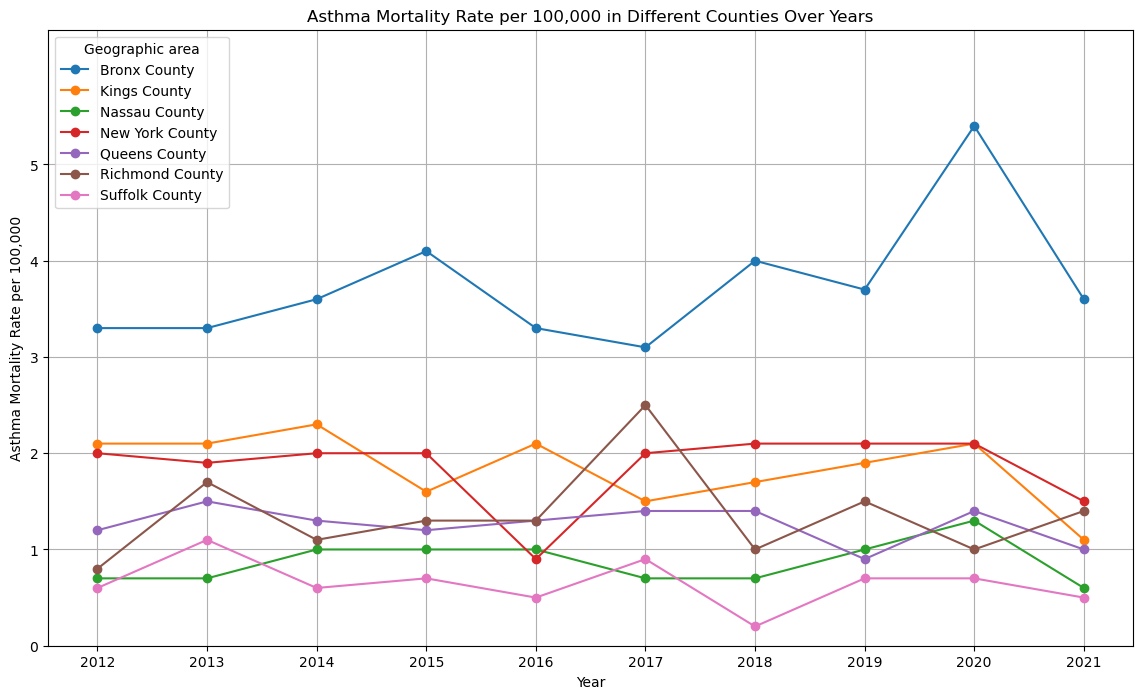

In [599]:
# Plotting

plt.figure(figsize=(14, 8))

for area in asthma_mortality_rate_pivot.index:
    plt.plot(asthma_mortality_rate_pivot.columns, asthma_mortality_rate_pivot.loc[area], marker='o', label=area)

plt.ylim(0, asthma_mortality_rate_pivot.values.max() + 1)
plt.xticks(asthma_mortality_rate_pivot.columns)  # Ensure x-ticks are set to the years
plt.yticks(range(0, int(asthma_mortality_rate_pivot.values.max()) + 1))  # Set Y-ticks to consistent intervals

plt.title('Asthma Mortality Rate per 100,000 in Different Counties Over Years')
plt.xlabel('Year')
plt.ylabel('Asthma Mortality Rate per 100,000')
plt.legend(title='Geographic area')
plt.grid(True)
plt.show()

# Cardiovascular Disease Mortality Rate Visualization

In [600]:
# Create a DataFrame of the cardiovascular_mortality_rate, and set index

cardiovascular_mortality_rate = df_selected[df_selected['Indicator Title'] == 'Cardiovascular disease mortality rate per 100,000']
cardiovascular_mortality_rate.set_index('Geographic area')

,Topic Area,Indicator Title,Year type,Year,Measurement,Rate/Percent
Geographic area,,,,,,
New York County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2018,Death Rate,217.1
Nassau County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2012,Death Rate,348.1
Suffolk County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2013,Death Rate,270.3
Suffolk County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2021,Death Rate,269.2
Suffolk County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2020,Death Rate,293.5
...,...,...,...,...,...,...
Richmond County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2012,Death Rate,303.4
Richmond County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2015,Death Rate,330.3
Richmond County,Cardiovascular Disease Indicators,"Cardiovascular disease mortality rate per 100,000",Data Year,2016,Death Rate,319.5


In [601]:
# Pivot the DataFrame
cardiovascular_mortality_rate_pivot = cardiovascular_mortality_rate.pivot(index='Geographic area', columns='Year', values='Rate/Percent')
cardiovascular_mortality_rate_pivot = cardiovascular_mortality_rate_pivot.apply(pd.to_numeric, errors='coerce')

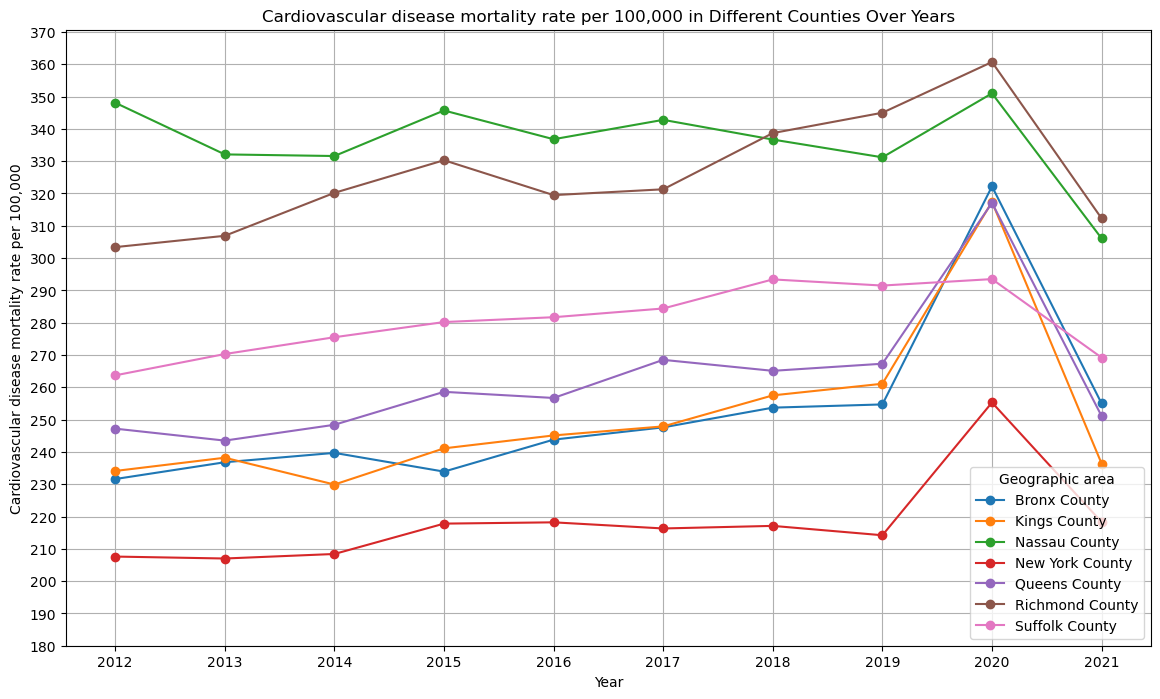

In [602]:
# Plotting

plt.figure(figsize=(14, 8))

for area in cardiovascular_mortality_rate_pivot.index:
    plt.plot(cardiovascular_mortality_rate_pivot.columns, cardiovascular_mortality_rate_pivot.loc[area], marker='o', label=area)

plt.ylim(180, cardiovascular_mortality_rate_pivot.values.max() + 10)
plt.xticks(cardiovascular_mortality_rate_pivot.columns)  # Ensure x-ticks are set to the years
plt.yticks(range(180, int(cardiovascular_mortality_rate_pivot.values.max()) + 20, 10))  # Set Y-ticks to consistent intervals

plt.title('Cardiovascular disease mortality rate per 100,000 in Different Counties Over Years')
plt.xlabel('Year')
plt.ylabel('Cardiovascular disease mortality rate per 100,000')
plt.legend(title='Geographic area')
plt.grid(True)
plt.show()

# Total Mortality Rate

In [603]:
# Create a DataFrame of the cardiovascular_mortality_rate, and set index
total_mortality_rate = df_selected[df_selected['Indicator Title'] == 'Total mortality rate per 100,000']

In [604]:
total_mortality_rate

,Topic Area,Indicator Title,Geographic area,Year type,Year,Measurement,Rate/Percent
284633,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Suffolk County,Data Year,2020,Death Rate,"1,054.2"
284291,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Nassau County,Data Year,2020,Death Rate,"1,058.7"
284843,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Kings County,Data Year,2017,Death Rate,624.7
284845,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Kings County,Data Year,2018,Death Rate,625.5
284847,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Kings County,Data Year,2019,Death Rate,619.7
...,...,...,...,...,...,...,...
284873,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Queens County,Data Year,2014,Death Rate,626.3
284869,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Queens County,Data Year,2012,Death Rate,613.4
284871,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",Queens County,Data Year,2013,Death Rate,606.8
284855,Health Status and Social Determinants of Health,"Total mortality rate per 100,000",New York County,Data Year,2014,Death Rate,612.2


In [605]:
# Pivot the DataFrame
total_mortality_rate_pivot = total_mortality_rate.pivot(index='Geographic area', columns='Year', values='Rate/Percent')

In [606]:
# Debug: Print the pivot table
print("Pivot Table:")
print(total_mortality_rate_pivot)

Pivot Table:
Year              2012   2013   2014   2015   2016   2017   2018   2019  \
Geographic area                                                           
Bronx County     630.7  638.6  644.3  656.3  672.2  660.0  685.1  684.6   
Kings County     594.9  601.7  606.1  609.6  612.6  624.7  625.5  619.7   
Nassau County    812.5  782.8  780.8  814.1  809.6  811.7  819.2  808.0   
New York County  582.9  599.9  612.2  621.7  608.8  600.6  618.6  603.6   
Queens County    613.4  606.8  626.3  630.7  629.9  634.8  641.9  641.2   
Richmond County  712.7  748.9  762.9  787.0  783.5  782.4  789.9  802.5   
Suffolk County   770.0  771.1  773.2  791.7  815.3  829.1  839.6  844.3   

Year                2020   2021  
Geographic area                  
Bronx County     1,114.6  830.7  
Kings County       969.7  717.2  
Nassau County    1,058.7  882.0  
New York County    849.4  714.1  
Queens County    1,012.2  738.0  
Richmond County  1,064.4  895.9  
Suffolk County   1,054.2  923.7  


In [607]:
# Fill NaN values
total_mortality_rate_pivot.loc['Bronx County', 2020] = 1114.6
total_mortality_rate_pivot.loc['Nassau County', 2020] = 1058.7
total_mortality_rate_pivot.loc['Queens County', 2020] = 1012.2
total_mortality_rate_pivot.loc['Richmond County', 2020] = 1064.4
total_mortality_rate_pivot.loc['Suffolk County', 2020] = 1054.2

In [608]:
total_mortality_rate_pivot = total_mortality_rate_pivot.apply(pd.to_numeric, errors='coerce')

In [609]:
# Debug: Print the pivot table
print("Pivot Table after filling NaN values:")
print(total_mortality_rate_pivot)

Pivot Table after filling NaN values:
Year              2012   2013   2014   2015   2016   2017   2018   2019  \
Geographic area                                                           
Bronx County     630.7  638.6  644.3  656.3  672.2  660.0  685.1  684.6   
Kings County     594.9  601.7  606.1  609.6  612.6  624.7  625.5  619.7   
Nassau County    812.5  782.8  780.8  814.1  809.6  811.7  819.2  808.0   
New York County  582.9  599.9  612.2  621.7  608.8  600.6  618.6  603.6   
Queens County    613.4  606.8  626.3  630.7  629.9  634.8  641.9  641.2   
Richmond County  712.7  748.9  762.9  787.0  783.5  782.4  789.9  802.5   
Suffolk County   770.0  771.1  773.2  791.7  815.3  829.1  839.6  844.3   

Year               2020   2021  
Geographic area                 
Bronx County     1114.6  830.7  
Kings County      969.7  717.2  
Nassau County    1058.7  882.0  
New York County   849.4  714.1  
Queens County    1012.2  738.0  
Richmond County  1064.4  895.9  
Suffolk County   1054.

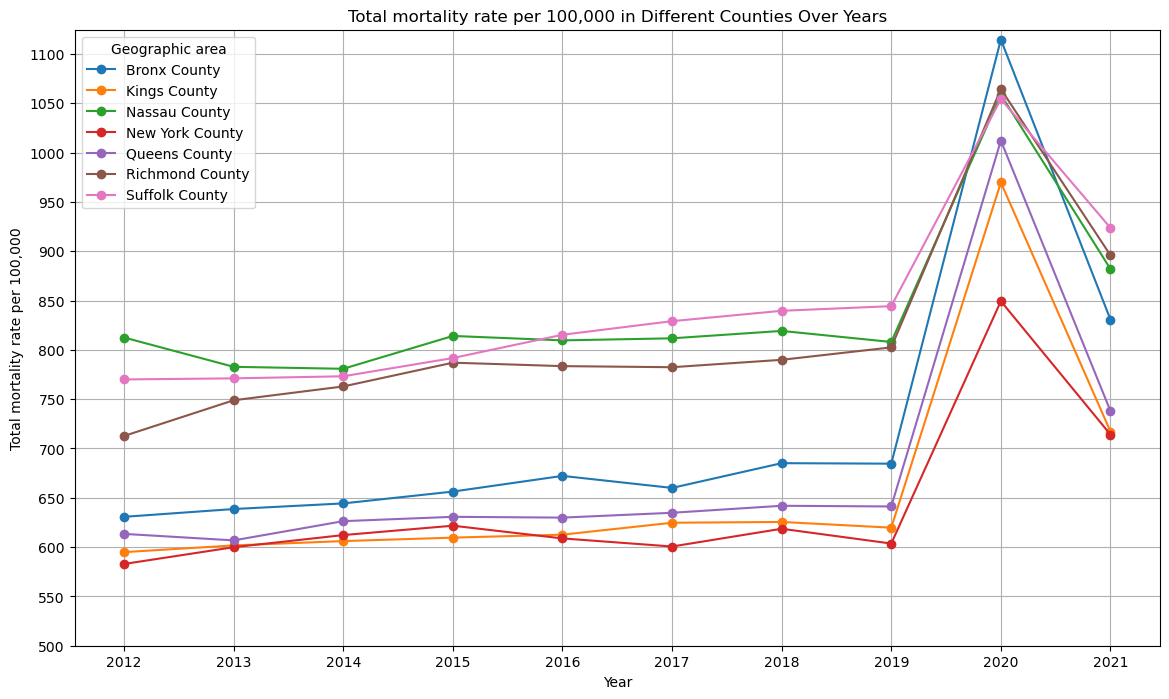

In [610]:
# Plotting

plt.figure(figsize=(14, 8))

for area in total_mortality_rate_pivot.index:
    plt.plot(total_mortality_rate_pivot.columns, total_mortality_rate_pivot.loc[area], marker='o', label=area)

plt.ylim(500, total_mortality_rate_pivot.values.max() + 10)
plt.xticks(total_mortality_rate_pivot.columns)  # Ensure x-ticks are set to the years
plt.yticks(range(500, int(total_mortality_rate_pivot.values.max()) + 20, 50))  # Set Y-ticks to consistent intervals

plt.title('Total mortality rate per 100,000 in Different Counties Over Years')
plt.xlabel('Year')
plt.ylabel('Total mortality rate per 100,000')
plt.legend(title='Geographic area')
plt.grid(True)
plt.show()